Распознавание рукописных букв английского языка

In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

In [ ]:
X = dataset[:,1:785]
Y = dataset[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

<ipython-input-4-345c6d01b830>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(5, 8, i+1)


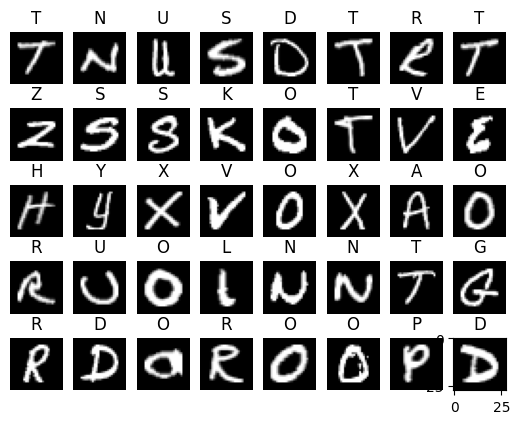

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


Обучающие и тестовые данные

In [ ]:
x_train.shape

(297960, 784)

In [ ]:
x_test.shape

(74491, 784)

In [ ]:
y_train.shape

(297960,)

In [ ]:
y_test.shape

(74491,)

Предварительная обработка данных, преобразуем их, чтобы все значения оказались в интервале  [0,1] .

In [ ]:
# изменение формы тензора
x_train = x_train.reshape((297960, 784))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_train = x_train.astype('float32') / 255

# изменение формы тензора
x_test = x_test.reshape((74491, 784))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
x_test = x_test.astype('float32') / 255

Векторизация меток, 26 букв в английском алфавите.

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 26) # Кодируем обучающие метки на 26 классов
y_test = to_categorical(y_test, 26)   # Кодируем тестовые метки на 26 классов

Моделирование нейронной сети.

In [ ]:
# Моделирование нейронной сети
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция модели
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# Обучение и оценка модели
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4, batch_size=128)

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

Epoch 1/4
2328/2328 [==============================] - 36s 15ms/step - loss: 0.2401 - accuracy: 0.9311 - val_loss: 0.1159 - val_accuracy: 0.9670
Epoch 2/4
2328/2328 [==============================] - 31s 13ms/step - loss: 0.0896 - accuracy: 0.9739 - val_loss: 0.0870 - val_accuracy: 0.9765
Epoch 3/4
2328/2328 [==============================] - 32s 14ms/step - loss: 0.0648 - accuracy: 0.9811 - val_loss: 0.0969 - val_accuracy: 0.9738
Epoch 4/4
2328/2328 [==============================] - 7s 3ms/step - loss: 0.0739 - accuracy: 0.9817
Точность на тестовом образцу: 0.9816756248474121
Потери на тестовом образце: 0.07387746125459671


График потерь

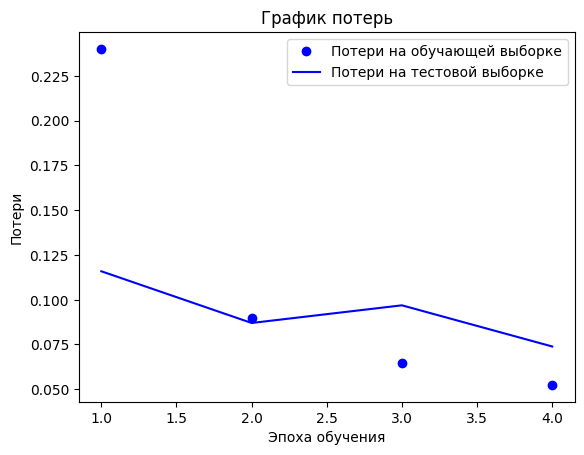

In [ ]:
# Построение графика потерь
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

График точности

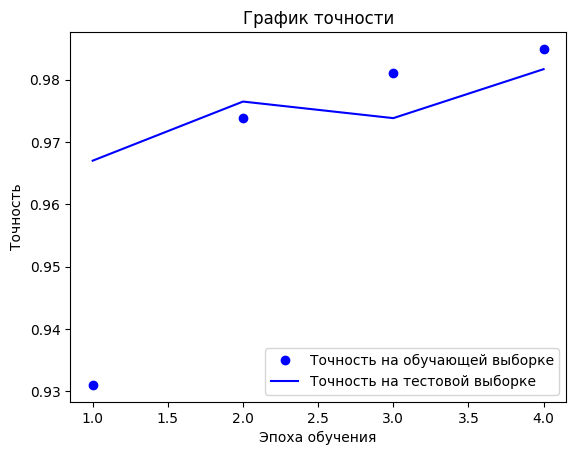

In [ ]:
# Построение графика точности
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()

График средней абсолютной ошибки

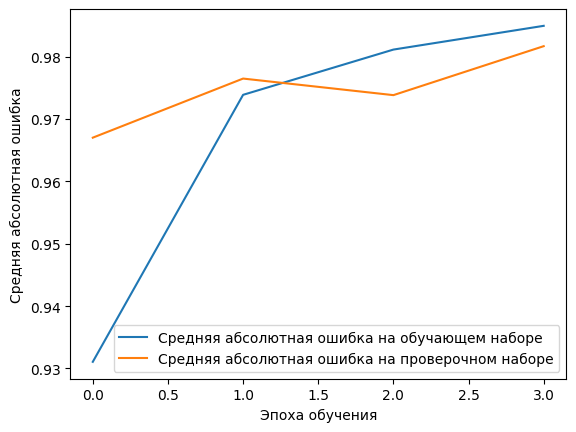

In [ ]:
# Построение графика средней абсолютной ошибки
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

На графиках видно, что на этапе обучения потери на первых двух эпохах снижаются, на 3-й же эпохе потери увеличились, что может свидетельствовать о переобученности модели, но на 4-ой опохе потери стали меньше и точность предсказаний увеличилась. Путем эксперементов было выявлено, что 4 эпохи, оптимальный вариант, т.к. после 5 эпохи модель начинает уменьшаться точность и потери начинают увеличиваться, что свидетельствует о переобученности.